# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [10]:
#import all libraries

import pandas as pd
import numpy as np 
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#read the data set
iris = pd.read_csv('Iris.csv')

#print 10 random rows using sample() function
sample10 = iris.sample(10)
sample10

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
143  144            6.8           3.2            5.9           2.3   
23    24            5.1           3.3            1.7           0.5   
87    88            6.3           2.3            4.4           1.3   
100  101            6.3           3.3            6.0           2.5   
36    37            5.5           3.5            1.3           0.2   
84    85            5.4           3.0            4.5           1.5   
1      2            4.9           3.0            1.4           0.2   
98    99            5.1           2.5            3.0           1.1   
63    64            6.1           2.9            4.7           1.4   
124  125            6.7           3.3            5.7           2.1   

             Species  
143   Iris-virginica  
23       Iris-setosa  
87   Iris-versicolor  
100   Iris-virginica  
36       Iris-setosa  
84   Iris-versicolor  
1        Iris-setosa  
98   Iris-versicolor  
63   Iris-versicolor  
124   Iris-virginica

## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [11]:
#get the info about the data 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
#get the boolean value reg each column
null_columns=iris.columns[iris.isnull().any()]
iris[null_columns].isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
dtype: int64

Fill missing values with median of that particular column

In [17]:
#check median for each 
iris.median()

Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [16]:
#fill each column with their median 
iris.fillna(iris.median(),inplace=True)
#check if any null value still remains
iris.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [25]:
#drop the column Id and store it in df 
df = iris.drop(['Id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


In [28]:
#use label Encoder for the Species data after removing the index 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species']) 
df['Species'].unique()


array([0, 1, 2], dtype=int64)

In [29]:
#check df 
df.head(5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [34]:
cor = df.corr()
cor

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871120      0.815986   
SepalWidthCm       -0.109369      1.000000      -0.420713     -0.356510   
PetalLengthCm       0.871120     -0.420713       1.000000      0.962043   
PetalWidthCm        0.815986     -0.356510       0.962043      1.000000   
Species             0.775061     -0.417318       0.944477      0.952513   

                Species  
SepalLengthCm  0.775061  
SepalWidthCm  -0.417318  
PetalLengthCm  0.944477  
PetalWidthCm   0.952513  
Species        1.000000

In [103]:
(df.corr()['Species'] <= -0.1 ) | ( df.corr()['Species'] >= 0.1 )

SepalLengthCm    True
SepalWidthCm     True
PetalLengthCm    True
PetalWidthCm     True
Species          True
Name: Species, dtype: bool

In [104]:
df.corr()['Species'].between(-0.1,0.1)

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
Name: Species, dtype: bool

In [40]:
cor_target = abs(cor['Species'])
cor_target

SepalLengthCm    0.775061
SepalWidthCm     0.417318
PetalLengthCm    0.944477
PetalWidthCm     0.952513
Species          1.000000
Name: Species, dtype: float64

In [41]:
relevant_features = cor_target[cor_target>0.1]
relevant_features

SepalLengthCm    0.775061
SepalWidthCm     0.417318
PetalLengthCm    0.944477
PetalWidthCm     0.952513
Species          1.000000
Name: Species, dtype: float64

In [42]:
#all fields are relevant nothing needs to be removed

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [47]:
df.var()<0.1
#hence nothing to drop

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

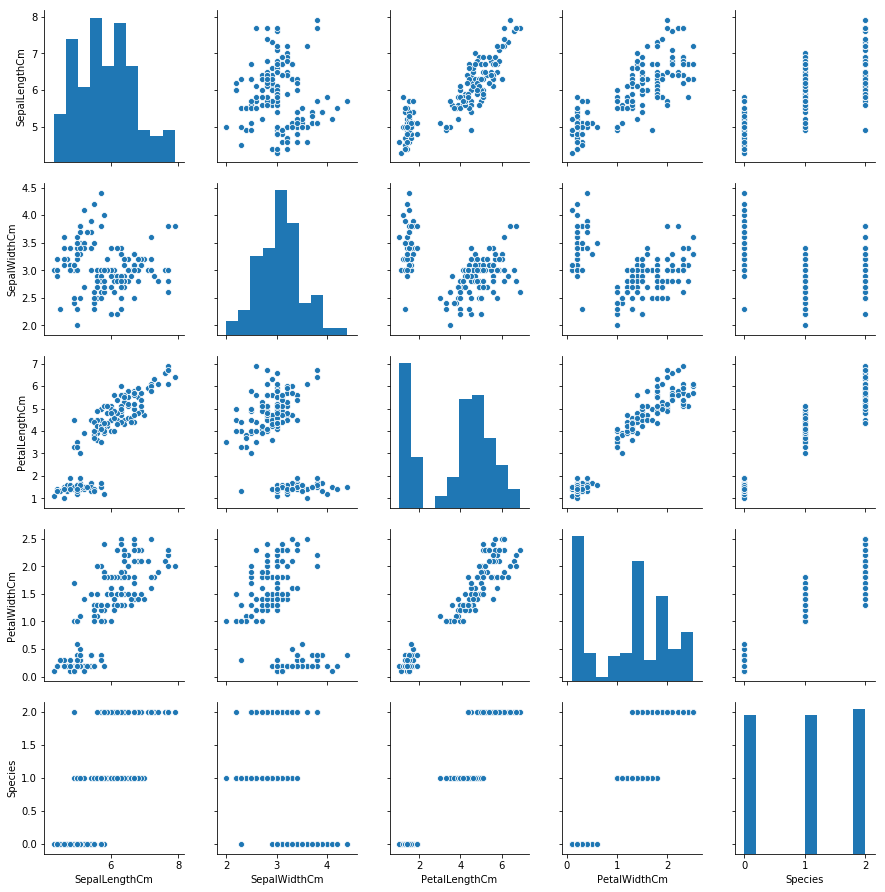

In [49]:
sns.pairplot(df)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.5 KB


In [52]:
y = df['Species']
x= df.drop(['Species'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=4)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [64]:
#scaling the test data 
# data is already split -- scale it 

sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

#knn k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)
print("Testing Accuracy with 3 neighbour")
print(knn.score(scaledX_test,y_test))
print(" Training Accuracy 3 neighbour")
print(knn.score(scaledX_train,y_train))

#k =5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaledX_train,y_train)
print("Testing Accuracy with 5 neighbour")
print(knn.score(scaledX_test,y_test))
print(" Training Accuracy 5 neighbour")
print(knn.score(scaledX_train,y_train))

#k=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(scaledX_train,y_train)
print("Testing Accuracy with 9 neighbour")
print(knn.score(scaledX_test,y_test))
print(" Training Accuracy 9 neighbour")
print(knn.score(scaledX_train,y_train))

Testing Accuracy with 3 neighbour
0.967741935483871
 Training Accuracy 3 neighbour
0.9504132231404959
Testing Accuracy with 5 neighbour
0.967741935483871
 Training Accuracy 5 neighbour
0.9586776859504132
Testing Accuracy with 9 neighbour
0.967741935483871
 Training Accuracy 9 neighbour
0.9586776859504132


In [96]:
#same testing using accuracy score 
y = df['Species']
x= df.drop(['Species'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=4)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)
y_pred = knn.predict(scaledX_test)
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

0.967741935483871


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

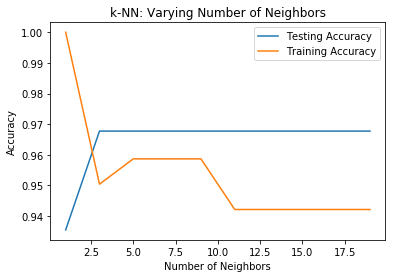

In [97]:
from matplotlib import pyplot as plt
neighbors = [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
y = df['Species']
x= df.drop(['Species'],axis=1)
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=4)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    pre = knn.predict
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test) 

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


**Ans ----THe optimal no of neighbors are (5-10)**

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

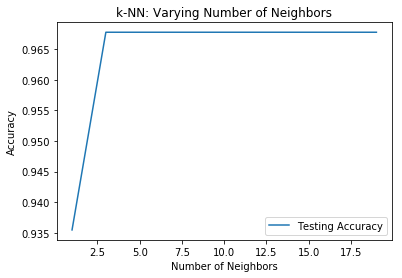

In [98]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
#plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

#### Check Missing Values

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

### Question 5
#### Find the distribution of target variable (Class) 

#### Plot the distribution of target variable using histogram

#### Convert the datatype of Bare Nuclei to `int`

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

#### Divide the Training and Test sets in 70:30 

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.